In [15]:
import pandas as pd
import os

# Set the folder path
folder_path = r"C:\Users\Lenovo\Downloads\Dataset elections\Raw Data"



In [17]:
#loading dataset in python
import os

print(os.listdir(folder_path))

['constituencywise_details.csv', 'constituencywise_results.csv', 'partywise_results.csv', 'states.csv', 'statewise_results.csv']


In [15]:
# creating dataframes 
import pandas as pd
import os

folder_path = r"C:\Users\Lenovo\Downloads\Dataset elections\Raw Data"

# Load each CSV file into separate DataFrames
constituency_details_df = pd.read_csv(os.path.join(folder_path, 'constituencywise_details.csv'))
constituency_results_df = pd.read_csv(os.path.join(folder_path, 'constituencywise_results.csv'))
partywise_results_df = pd.read_csv(os.path.join(folder_path, 'partywise_results.csv'))
states_df = pd.read_csv(os.path.join(folder_path, 'states.csv'))
statewise_results_df = pd.read_csv(os.path.join(folder_path, 'statewise_results.csv'))

# Preview any one to confirm
print(constituency_details_df.head())

   S.N.            Candidate                     Party  EVM Votes  \
0     1    DR JITENDRA SINGH    Bharatiya Janata Party     566833   
1     2         CH LAL SINGH  Indian National Congress     444151   
2     3  GHULAM MOHD SAROORI               Independent      39519   
3     4           MEHRAJ DIN               Independent       9055   
4     5           AMIT KUMAR       Bahujan Samaj Party       8559   

   Postal Votes  Total Votes  % of Votes Constituency ID  
0          4243       571076       51.28            U084  
1          2552       446703       40.11            U084  
2            80        39599        3.56            U084  
3            27         9082        0.82            U084  
4            83         8642        0.78            U084  


In [23]:
print(partywise_results_df.head())

                                               Party  Won  Party ID
0                             Aam Aadmi Party - AAAP    3         1
1                All India Trinamool Congress - AITC   29       140
2       Communist Party of India  (Marxist) - CPI(M)    4       547
3  Communist Party of India  (Marxist-Leninist)  ...    2       545
4                     Communist Party of India - CPI    2       544


In [39]:
#total seats
total_seats=constituency_results_df['Parliament Constituency'].nunique()
print("Total seats:",total_seats)

Total seats: 543


In [37]:
print(constituency_results_df.columns.tolist())

['S.No', 'Parliament Constituency', 'Constituency Name', 'Winning Candidate', 'Total Votes', 'Margin', 'Constituency ID', 'Party ID']


In [47]:
# Assuming all necessary DataFrames (constituency_results_df, statewise_results_df, states_df) are loaded and cleaned

# Clean column names for consistency
for df in [constituency_results_df, statewise_results_df, states_df]:
    df.columns = df.columns.str.strip().str.replace(' ', '_')

# Merge constituency and statewise results
merged_df = pd.merge(constituency_results_df, statewise_results_df, on='Parliament_Constituency', how='inner')

# Merge with states to get state names
merged_df = pd.merge(merged_df, states_df, on='State_ID', how='inner')

# Group and count total seats
statewise_seats = merged_df.groupby('State')['Constituency_ID'].count().reset_index()
statewise_seats.columns = ['State_Name', 'Total_Seats_Available']

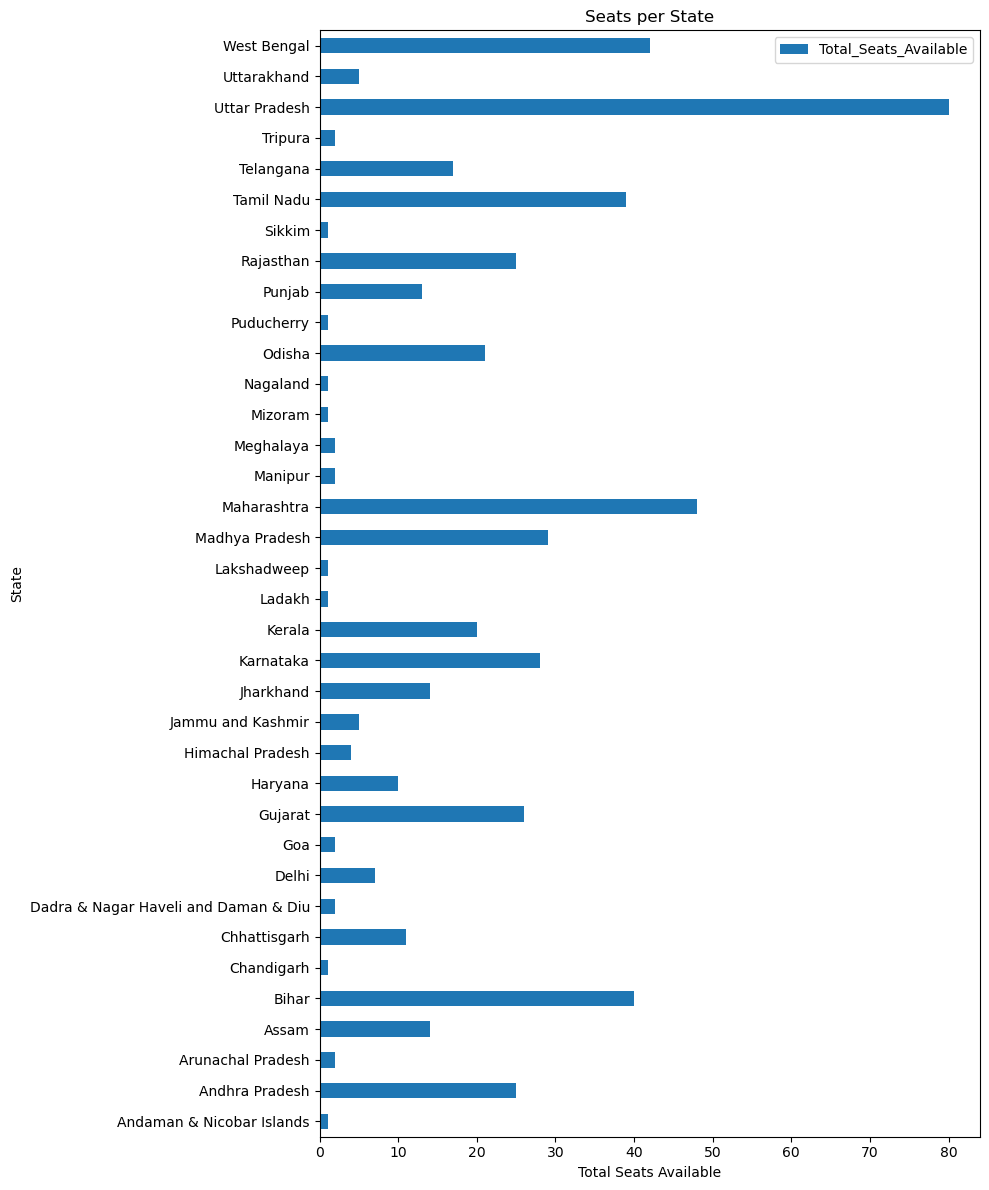

In [49]:
#seats per state 
import matplotlib.pyplot as plt

# Horizontal bar chart
statewise_seats.plot(
    kind='barh',
    x='State_Name',
    y='Total_Seats_Available',
    figsize=(10, 12),
    title='Seats per State'
)

plt.xlabel('Total Seats Available')
plt.ylabel('State')
plt.tight_layout()  # Fixes label cut-off issues
plt.show()

In [53]:
print(df.columns)


Index(['State_ID', 'State'], dtype='object')


In [57]:
for name, var in globals().items():
    if isinstance(var, pd.DataFrame):
        print(f"{name}: {var.shape} → {var.columns.tolist()}")


constituency_details_df: (8902, 8) → ['S.N.', 'Candidate', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes', 'Constituency ID']
constituency_results_df: (543, 8) → ['S.No', 'Parliament_Constituency', 'Constituency_Name', 'Winning_Candidate', 'Total_Votes', 'Margin', 'Constituency_ID', 'Party_ID']
partywise_results_df: (42, 3) → ['Party', 'Won', 'Party ID']
states_df: (36, 2) → ['State_ID', 'State']
statewise_results_df: (543, 9) → ['Constituency', 'Const._No.', 'Parliament_Constituency', 'Leading_Candidate', 'Trailing_Candidate', 'Margin', 'Status', 'State_ID', 'Country']
df: (36, 2) → ['State_ID', 'State']
merged_df: (543, 17) → ['S.No', 'Parliament_Constituency', 'Constituency_Name', 'Winning_Candidate', 'Total_Votes', 'Margin_x', 'Constituency_ID', 'Party_ID', 'Constituency', 'Const._No.', 'Leading_Candidate', 'Trailing_Candidate', 'Margin_y', 'Status', 'State_ID', 'Country', 'State']
statewise_seats: (36, 2) → ['State_Name', 'Total_Seats_Available']


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
partywise_results_df.columns = partywise_results_df.columns.str.strip().str.lower()


In [61]:
nda_parties = [
    'Bharatiya Janata Party - BJP', 
    'Telugu Desam - TDP', 
    'Janata Dal (United) - JD(U)',
    'Shiv Sena - SHS', 
    'AJSU Party - AJSUP', 
    'Apna Dal (Soneylal) - ADAL', 
    'Asom Gana Parishad - AGP',
    'Hindustani Awam Morcha (Secular) - HAMS', 
    'Janasena Party - JnP', 
    'Janata Dal (Secular) - JD(S)',
    'Lok Janshakti Party(Ram Vilas) - LJPRV', 
    'Nationalist Congress Party - NCP',
    'Rashtriya Lok Dal - RLD', 
    'Sikkim Krantikari Morcha - SKM'
]

# Convert to lowercase for matching
nda_parties = [p.lower() for p in nda_parties]


In [63]:
nda_df = partywise_results_df[
    partywise_results_df['party'].str.strip().str.lower().isin(nda_parties)
]


In [73]:
#seats won by NDA
total_seats_won_by_nda = nda_df['won'].sum()
print("✅ Total NDA Seats Won:", total_seats_won_by_nda)


✅ Total NDA Seats Won: 292


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12168\483524216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nda_df_sorted['won'], y=nda_df_sorted['party'], palette='flare')


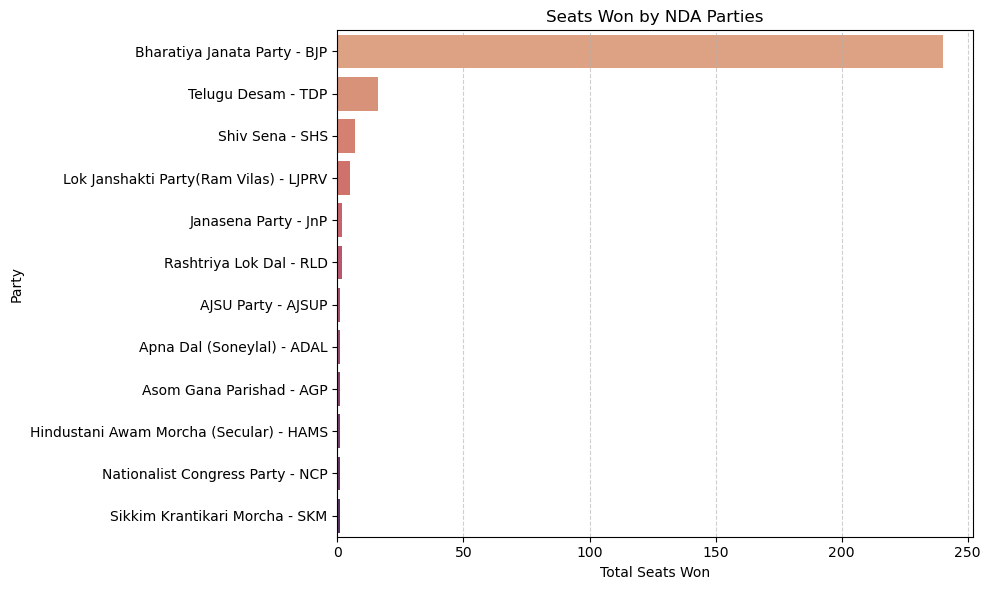

In [67]:
# Sort data
nda_df_sorted = nda_df.sort_values(by='won', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=nda_df_sorted['won'], y=nda_df_sorted['party'], palette='flare')

plt.title('Seats Won by NDA Parties')
plt.xlabel('Total Seats Won')
plt.ylabel('Party')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [71]:
print(partywise_results_df.columns)


Index(['party', 'won', 'party id'], dtype='object')


In [73]:
print(partywise_results_df['party'].unique())


['Aam Aadmi Party - AAAP' 'All India Trinamool Congress - AITC'
 'Communist Party of India  (Marxist) - CPI(M)'
 'Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)'
 'Communist Party of India - CPI' 'Dravida Munnetra Kazhagam - DMK'
 'Indian National Congress - INC' 'Indian Union Muslim League - IUML'
 'Jammu & Kashmir National Conference - JKN'
 'Jharkhand Mukti Morcha - JMM' 'Kerala Congress - KEC'
 'Marumalarchi Dravida Munnetra Kazhagam - MDMK'
 'Nationalist Congress Party Sharadchandra Pawar - NCPSP'
 'Rashtriya Janata Dal - RJD' 'Rashtriya Loktantrik Party - RLTP'
 'Revolutionary Socialist Party - RSP' 'Samajwadi Party - SP'
 'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT'
 'Viduthalai Chiruthaigal Katchi - VCK'
 'Aazad Samaj Party (Kanshi Ram) - ASPKR' 'AJSU Party - AJSUP'
 'All India Majlis-E-Ittehadul Muslimeen - AIMIM'
 'Apna Dal (Soneylal) - ADAL' 'Asom Gana Parishad - AGP'
 'Bharat Adivasi Party - BHRTADVSIP' 'Bharatiya Janata Party - BJP'
 'Hindustan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Assuming you've already loaded your data into `partywise_results_df`
partywise_results_df.columns = partywise_results_df.columns.str.strip().str.lower()


In [21]:
nda_parties = [
    'Bharatiya Janata Party - BJP', 
    'Telugu Desam - TDP', 
    'Janata Dal  (United) - JD(U)',
    'Shiv Sena - SHS', 
    'AJSU Party - AJSUP', 
    'Apna Dal (Soneylal) - ADAL', 
    'Asom Gana Parishad - AGP',
    'Hindustani Awam Morcha (Secular) - HAMS', 
    'Janasena Party - JnP', 
    'Janata Dal  (Secular) - JD(S)',
    'Lok Janshakti Party(Ram Vilas) - LJPRV', 
    'Nationalist Congress Party - NCP',
    'Rashtriya Lok Dal - RLD', 
    'Sikkim Krantikari Morcha - SKM'
]

# Clean the party names for case-insensitive match
nda_parties_cleaned = [p.strip().lower() for p in nda_parties]


In [23]:
nda_df = partywise_results_df[
    partywise_results_df['party'].str.strip().str.lower().isin(nda_parties_cleaned)
]


In [25]:
nda_df = nda_df.rename(columns={
    'party': 'Party_Name',
    'won': 'Seats_Won'
})


In [27]:
nda_df_sorted = nda_df.sort_values(by='Seats_Won', ascending=False)


In [29]:
print(nda_df_sorted[['Party_Name', 'Seats_Won']])


                                 Party_Name  Seats_Won
25             Bharatiya Janata Party - BJP        240
37                       Telugu Desam - TDP         16
30             Janata Dal  (United) - JD(U)         12
35                          Shiv Sena - SHS          7
31   Lok Janshakti Party(Ram Vilas) - LJPRV          5
28                     Janasena Party - JnP          2
29            Janata Dal  (Secular) - JD(S)          2
33                  Rashtriya Lok Dal - RLD          2
20                       AJSU Party - AJSUP          1
22               Apna Dal (Soneylal) - ADAL          1
23                 Asom Gana Parishad - AGP          1
26  Hindustani Awam Morcha (Secular) - HAMS          1
32         Nationalist Congress Party - NCP          1
36           Sikkim Krantikari Morcha - SKM          1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33768\2011212396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seats_Won', y='Party_Name', data=nda_df_sorted, palette='crest')


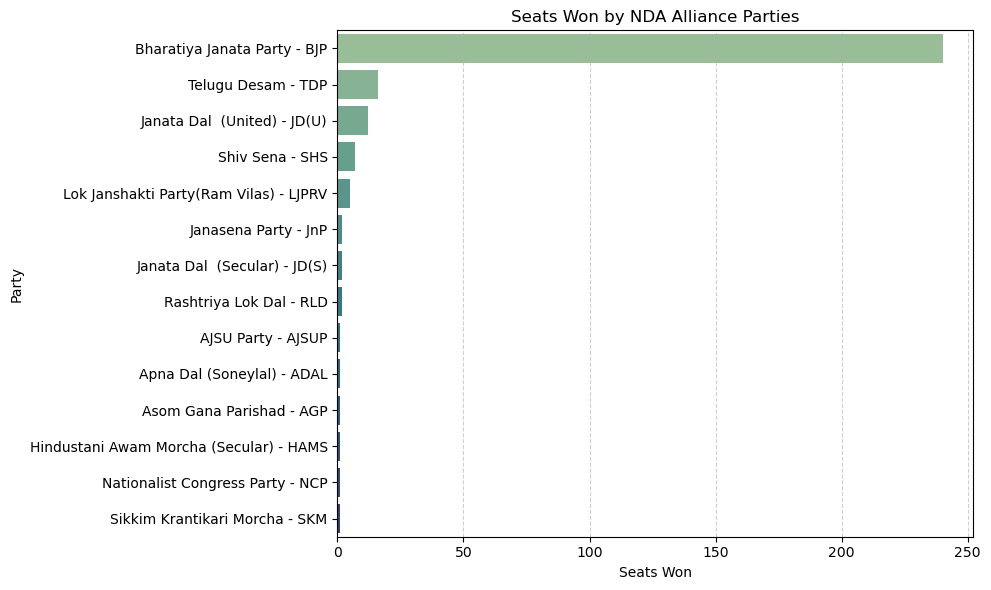

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Seats_Won', y='Party_Name', data=nda_df_sorted, palette='crest')
plt.title("Seats Won by NDA Alliance Parties")
plt.xlabel("Seats Won")
plt.ylabel("Party")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [35]:
partywise_results_df.columns = partywise_results_df.columns.str.strip().str.lower()


In [37]:
india_alliance_parties = [
    'Indian National Congress - INC',
    'Aam Aadmi Party - AAAP',
    'All India Trinamool Congress - AITC',
    'Bharat Adivasi Party - BHRTADVSIP',
    'Communist Party of India  (Marxist) - CPI(M)',
    'Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)',
    'Communist Party of India - CPI',
    'Dravida Munnetra Kazhagam - DMK',
    'Indian Union Muslim League - IUML',
    'Jammu & Kashmir National Conference - JKN',
    'Jharkhand Mukti Morcha - JMM',
    'Kerala Congress - KEC',
    'Marumalarchi Dravida Munnetra Kazhagam - MDMK',
    'Nationalist Congress Party Sharadchandra Pawar - NCPSP',
    'Rashtriya Janata Dal - RJD',
    'Rashtriya Loktantrik Party - RLTP',
    'Revolutionary Socialist Party - RSP',
    'Samajwadi Party - SP',
    'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT',
    'Viduthalai Chiruthaigal Katchi - VCK'
]

# Clean for matching
india_alliance_cleaned = [p.lower().strip() for p in india_alliance_parties]


In [39]:
india_df = partywise_results_df[
    partywise_results_df['party'].str.strip().str.lower().isin(india_alliance_cleaned)
]

# Rename columns
india_df = india_df.rename(columns={'party': 'Party_Name', 'won': 'Seats_Won'})

# Sort like SQL
india_df_sorted = india_df.sort_values(by='Seats_Won', ascending=False)

# Show result
print(india_df_sorted[['Party_Name', 'Seats_Won']])


                                           Party_Name  Seats_Won
6                      Indian National Congress - INC         99
16                               Samajwadi Party - SP         37
1                 All India Trinamool Congress - AITC         29
5                     Dravida Munnetra Kazhagam - DMK         22
17     Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT          9
12  Nationalist Congress Party Sharadchandra Pawar...          8
2        Communist Party of India  (Marxist) - CPI(M)          4
13                         Rashtriya Janata Dal - RJD          4
0                              Aam Aadmi Party - AAAP          3
7                   Indian Union Muslim League - IUML          3
9                        Jharkhand Mukti Morcha - JMM          3
3   Communist Party of India  (Marxist-Leninist)  ...          2
4                      Communist Party of India - CPI          2
8           Jammu & Kashmir National Conference - JKN          2
18               Viduthal

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33768\3944227188.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seats_Won', y='Party_Name', data=india_df_sorted, palette='magma')


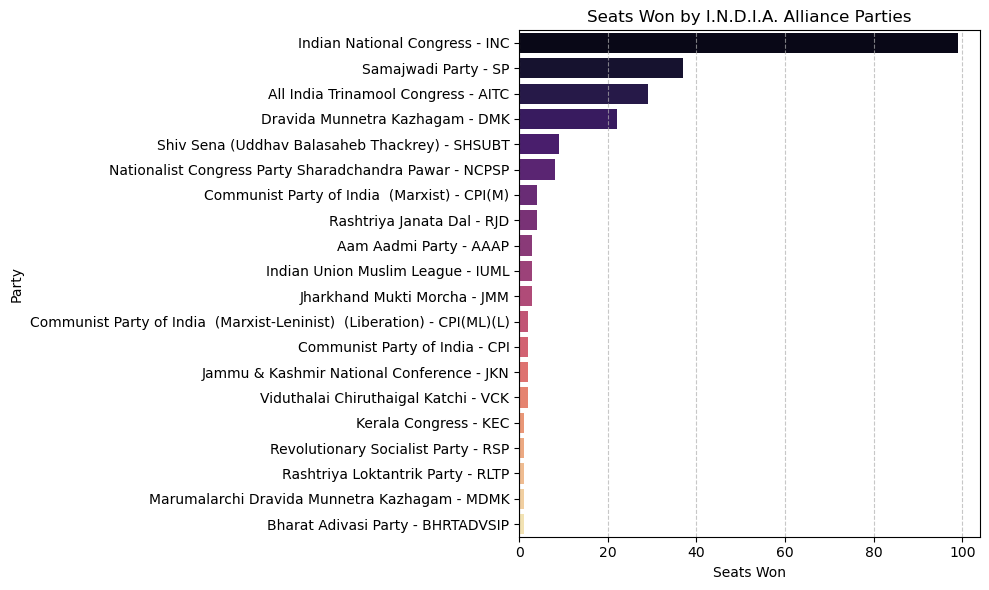

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Seats_Won', y='Party_Name', data=india_df_sorted, palette='magma')

plt.title("Seats Won by I.N.D.I.A. Alliance Parties")
plt.xlabel("Seats Won")
plt.ylabel("Party")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [43]:
partywise_results_df.columns = partywise_results_df.columns.str.strip().str.lower()


In [45]:
india_alliance_parties = [
    'Indian National Congress - INC',
    'Aam Aadmi Party - AAAP',
    'All India Trinamool Congress - AITC',
    'Bharat Adivasi Party - BHRTADVSIP',
    'Communist Party of India  (Marxist) - CPI(M)',
    'Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)',
    'Communist Party of India - CPI',
    'Dravida Munnetra Kazhagam - DMK',
    'Indian Union Muslim League - IUML',
    'Jammu & Kashmir National Conference - JKN',
    'Jharkhand Mukti Morcha - JMM',
    'Kerala Congress - KEC',
    'Marumalarchi Dravida Munnetra Kazhagam - MDMK',
    'Nationalist Congress Party Sharadchandra Pawar - NCPSP',
    'Rashtriya Janata Dal - RJD',
    'Rashtriya Loktantrik Party - RLTP',
    'Revolutionary Socialist Party - RSP',
    'Samajwadi Party - SP',
    'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT',
    'Viduthalai Chiruthaigal Katchi - VCK'
]


In [47]:
india_alliance_cleaned = [p.strip().lower() for p in india_alliance_parties]


In [49]:
india_df = partywise_results_df[
    partywise_results_df['party'].str.strip().str.lower().isin(india_alliance_cleaned)
]

total_india_seats = india_df['won'].sum()
print("✅ Total Seats Won by I.N.D.I.A. Alliance:", total_india_seats)


✅ Total Seats Won by I.N.D.I.A. Alliance: 234


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Alliance': ['NDA', 'I.N.D.I.A.'],
    'Seats_Won': [total_nda, total_india]
}
alliance_df = pd.DataFrame(data)

# Bar Chart
plt.figure(figsize=(6, 5))
sns.barplot(x='Alliance', y='Seats_Won', data=alliance_df, palette='Set2')
plt.title('Total Seats Won by Each Alliance')
plt.ylabel('Seats Won')
plt.xlabel('Alliance')
plt.ylim(0, max(total_nda, total_india) + 20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


NameError: name 'total_nda' is not defined

In [53]:
# Clean column names once
partywise_results_df.columns = partywise_results_df.columns.str.strip().str.lower()

# NDA Alliance Parties
nda_parties = [
    'Bharatiya Janata Party - BJP', 
    'Telugu Desam - TDP', 
    'Janata Dal  (United) - JD(U)',
    'Shiv Sena - SHS', 
    'AJSU Party - AJSUP', 
    'Apna Dal (Soneylal) - ADAL', 
    'Asom Gana Parishad - AGP',
    'Hindustani Awam Morcha (Secular) - HAMS', 
    'Janasena Party - JnP', 
    'Janata Dal  (Secular) - JD(S)',
    'Lok Janshakti Party(Ram Vilas) - LJPRV', 
    'Nationalist Congress Party - NCP',
    'Rashtriya Lok Dal - RLD', 
    'Sikkim Krantikari Morcha - SKM'
]
nda_cleaned = [p.lower().strip() for p in nda_parties]

# I.N.D.I.A. Alliance Parties
india_alliance_parties = [
    'Indian National Congress - INC',
    'Aam Aadmi Party - AAAP',
    'All India Trinamool Congress - AITC',
    'Bharat Adivasi Party - BHRTADVSIP',
    'Communist Party of India  (Marxist) - CPI(M)',
    'Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)',
    'Communist Party of India - CPI',
    'Dravida Munnetra Kazhagam - DMK',
    'Indian Union Muslim League - IUML',
    'Jammu & Kashmir National Conference - JKN',
    'Jharkhand Mukti Morcha - JMM',
    'Kerala Congress - KEC',
    'Marumalarchi Dravida Munnetra Kazhagam - MDMK',
    'Nationalist Congress Party Sharadchandra Pawar - NCPSP',
    'Rashtriya Janata Dal - RJD',
    'Rashtriya Loktantrik Party - RLTP',
    'Revolutionary Socialist Party - RSP',
    'Samajwadi Party - SP',
    'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT',
    'Viduthalai Chiruthaigal Katchi - VCK'
]
india_cleaned = [p.lower().strip() for p in india_alliance_parties]

# Total NDA Seats
nda_df = partywise_results_df[
    partywise_results_df['party'].str.strip().str.lower().isin(nda_cleaned)
]
total_nda = nda_df['won'].sum()

# Total INDIA Seats
india_df = partywise_results_df[
    partywise_results_df['party'].str.strip().str.lower().isin(india_cleaned)
]
total_india = india_df['won'].sum()

print(f"NDA Total: {total_nda}, INDIA Total: {total_india}")


NDA Total: 292, INDIA Total: 234


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33768\2005082808.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Alliance', y='Seats_Won', data=df, palette=['#ff9933', '#0066cc'])


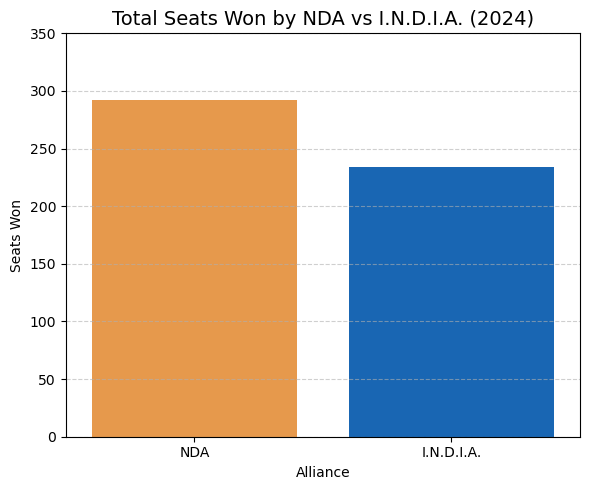

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Alliance': ['NDA', 'I.N.D.I.A.'],
    'Seats_Won': [292, 234]
}
df = pd.DataFrame(data)

# Bar Plot
plt.figure(figsize=(6, 5))
sns.barplot(x='Alliance', y='Seats_Won', data=df, palette=['#ff9933', '#0066cc'])
plt.title('Total Seats Won by NDA vs I.N.D.I.A. (2024)', fontsize=14)
plt.ylabel('Seats Won')
plt.ylim(0, 350)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


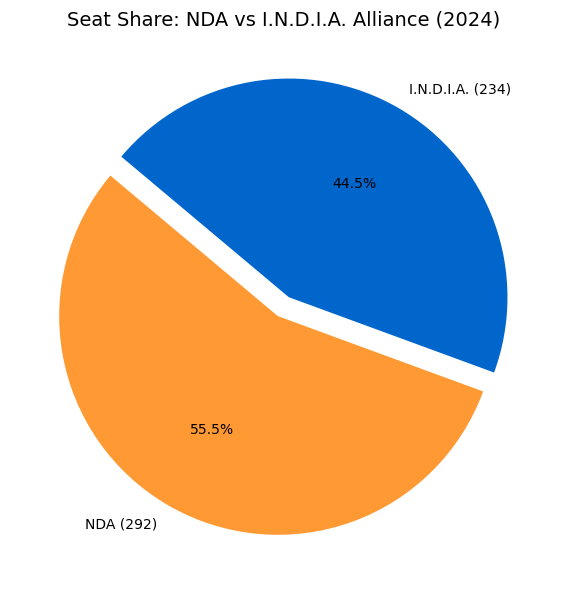

In [63]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(
    [292, 234],
    labels=['NDA (292)', 'I.N.D.I.A. (234)'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9933', '#0066cc'],
    explode=(0.05, 0.05)
)
plt.title('Seat Share: NDA vs I.N.D.I.A. Alliance (2024)', fontsize=14)
plt.tight_layout()
plt.show()


In [65]:
total_seats_won_by_nda = nda_df['won'].sum()
print("✅ Total NDA Seats Won:", total_seats_won_by_nda)

✅ Total NDA Seats Won: 292
